В данном исследовании предполагается, в первую очередь, выполнить приоретизацию гипотез на основании фреймворков ICE и RICE, чтобы определить наиболее перспективные идеи для внедрения в практику.
<br>
После этого требуется обработать и проанализировать результаты а/б теста, сопоставить результаты групп и определить наличие каких-либо различий и, в случае обнаружения, оценить их статистическую значимость.
<br>
На основании этого можно будет сделать вывод о результатах а/б теста.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
try:
    hypothesis = pd.read_csv('C:/Anaconda/Practicum/5hypothesis.csv')
    orders = pd.read_csv('C:/Anaconda/Practicum/5orders.csv')
    visitors = pd.read_csv('C:/Anaconda/Practicum/5visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Фреймворк ICE**

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
hypothesis = hypothesis.sort_values(by = 'ice', ascending = False, ignore_index = True)
hypothesis.index +=1
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice
1,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
3,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
4,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
5,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
8,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
9,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наибольший приоритет получает предложение о запуске акции со скидкой на день рождения. Также высокий приоритет у идей с добавлением двух новых каналов привлечения трафика и формой подписки на все основные страницы. <br>
Предложения об изменении фона главной страницы и добавлении страницы отзывов получают низкий приоритет из-за небольшого уровня уверенности в полезности этих изменений, а изменение структуры категорий и запуск собственной службы доставки - из-за больших трудозатрат.

**Фреймворк RICE**

In [5]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
hypothesis.drop(columns = 'ice', inplace = True)
hypothesis.sort_values(by = 'rice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,rice
3,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
5,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
4,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
1,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
8,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
9,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


В этом фреймворке наибольший приоритет получает добавление формы подписки из-за максимального охвата, также высокий приоритет у блоков рекомендаций, также благодаря охвату аудитории. Новые каналы и баннеры с актуальными акциями сохраняют достаточно высокий уровень приоритета, а скидки на день рождения перемещаются на пятое место, так как имеют минимальный охват.
<br>
Изменение цвета главной страницы и отзывы клиентов остались с самым низким приоритетом.

А/Б тест
-----

**Предобработка**

In [6]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [9]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [10]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

In [11]:
same_users = orders[np.logical_and(orders['group'] == 'A'\
                      ,orders[orders['group'] == 'A']['visitor_id'].isin(orders[orders['group'] == 'B']['visitor_id']))]
same_users

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
26,2223239646,199603092,2019-08-15,3488,A
29,2220299125,3803269165,2019-08-15,700,A
33,486237576,2378935119,2019-08-15,1650,A
41,2594268419,237748145,2019-08-15,1090,A
...,...,...,...,...,...
1167,3757656646,4186807279,2019-08-14,4990,A
1173,3612788481,2712142231,2019-08-14,2490,A
1178,4052155355,2949041841,2019-08-14,190,A
1183,1458356232,963407295,2019-08-14,4940,A


In [12]:
same_users['visitor_id'].nunique()

58

Явных пропусков и дубликатов нет, есть 58 пользователей, попавших в обе группы, их лучше убрать из анализа

In [13]:
orders = orders[np.logical_not(orders['visitor_id'].isin(same_users['visitor_id']))]

In [14]:
orders_grouped = orders.groupby(['date', 'group'])\
.agg(revenue_sum = ('revenue','sum'), revenue_mean = ('revenue', 'mean'),\
     orders_count = ('transaction_id', 'nunique'))\
.reset_index().sort_values(by = 'date')
orders_grouped['revenue_mean'] = orders_grouped['revenue_mean'].round(3)
orders_grouped = orders_grouped.merge(visitors, left_on = ['date', 'group'], right_on = ['date', 'group'], how = 'left')
orders_grouped['orders_avg'] = orders_grouped['orders_count'] / orders_grouped['visitors']
orders_grouped

,date,group,revenue_sum,revenue_mean,orders_count,visitors,orders_avg
0,2019-08-01,A,142779,6207.783,23,719,0.031989
1,2019-08-01,B,59758,3515.176,17,713,0.023843
2,2019-08-02,A,91602,4821.158,19,619,0.030695
3,2019-08-02,B,162043,7045.348,23,581,0.039587
4,2019-08-03,A,112473,4686.375,24,507,0.047337
...,...,...,...,...,...,...,...
57,2019-08-29,B,106100,7073.333,15,531,0.028249
58,2019-08-30,A,78180,8686.667,9,490,0.018367
59,2019-08-30,B,209223,9963.000,21,490,0.042857
60,2019-08-31,A,53243,6655.375,8,699,0.011445


**Создание датафреймов с информацией о группах теста**

In [15]:
orders_a_cum = orders_grouped[orders_grouped['group'] == 'A']
orders_a_cum = orders_a_cum.apply(
lambda x: orders_a_cum[orders_a_cum['date'] <= x['date']]\
    .agg({'date':'max', 'revenue_sum':'sum', 'revenue_mean':'mean', 'orders_avg':'mean'}), axis = 1)

In [16]:
orders_b_cum = orders_grouped[orders_grouped['group'] == 'B']
orders_b_cum = orders_b_cum.apply(
lambda x: orders_b_cum[orders_b_cum['date'] <= x['date']]\
    .agg({'date':'max', 'revenue_sum':'sum', 'revenue_mean':'mean', 'orders_avg':'mean'}), axis = 1)

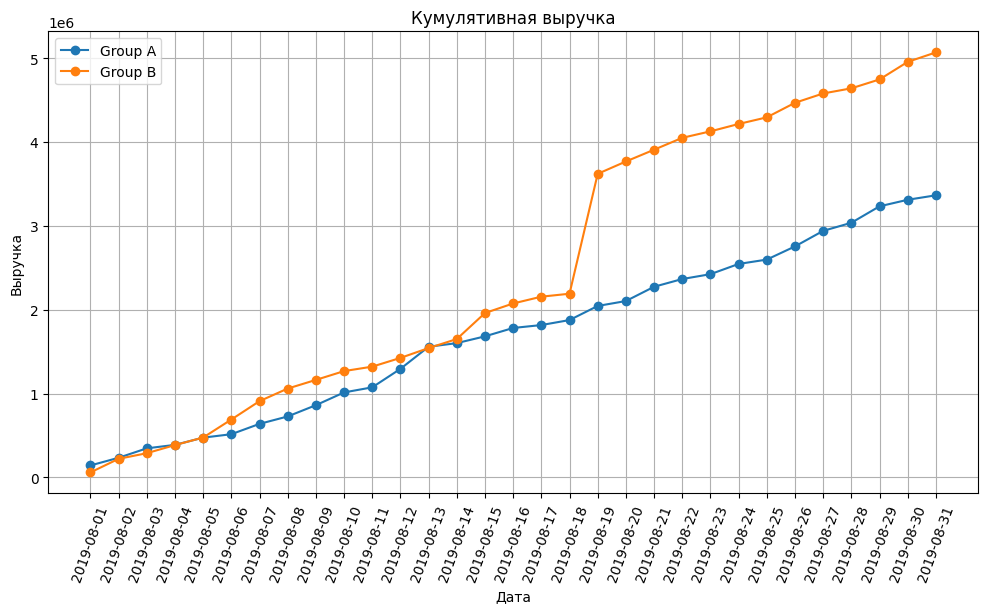

In [17]:
plt.figure(figsize = (12, 6))
plt.plot(orders_a_cum['date'], orders_a_cum['revenue_sum'], label = 'Group A', marker = 'o')
plt.plot(orders_b_cum['date'], orders_b_cum['revenue_sum'], label = 'Group B', marker = 'o')
plt.xticks(rotation = 70)
plt.grid()
plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка')
plt.show;

Выручка плавно накапливается в обеих группах, отмечается резкий скачок группы "В", возможно, это связано с крупным заказом.

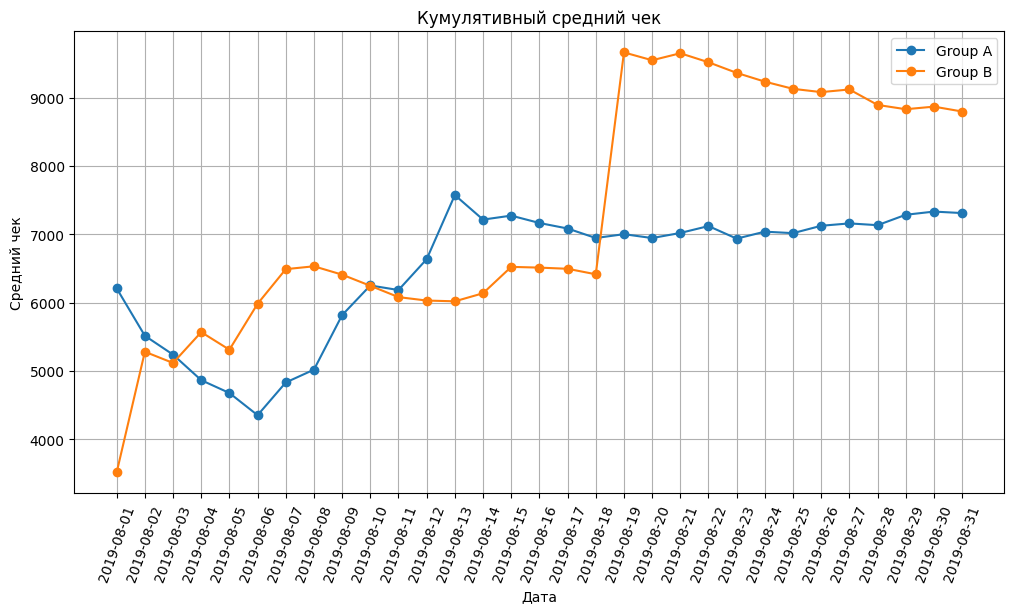

In [18]:
plt.figure(figsize = (12, 6))
plt.plot(orders_a_cum['date'], orders_a_cum['revenue_mean'], label = 'Group A', marker = 'o')
plt.plot(orders_b_cum['date'], orders_b_cum['revenue_mean'], label = 'Group B', marker = 'o')
plt.xticks(rotation = 70)
plt.legend()
plt.grid()
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Кумулятивный средний чек')
plt.show;

Средний чек группы "А" стабилизировался примерно к середине исследования, средний чек группы "В" резко вырос в середине, вероятно, за счет одного большого заказа, после чего плавно снижается к среднему первой группы.

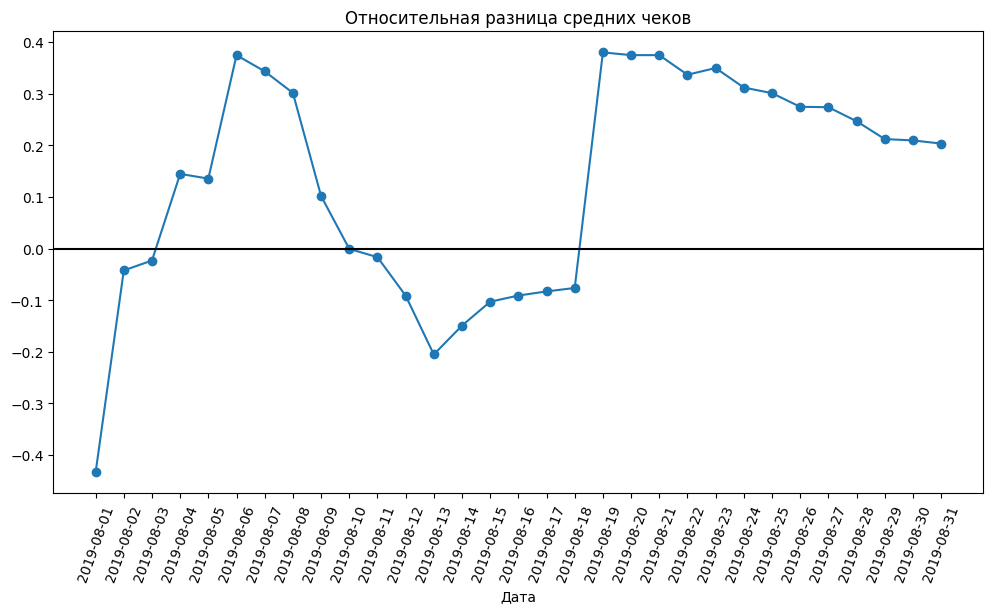

In [19]:
plt.figure(figsize = (12, 6))
orders_cum = orders_a_cum.merge(orders_b_cum, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['_a', '_b'])
plt.plot(orders_cum['date'], orders_cum['revenue_mean_b'] / orders_cum['revenue_mean_a']-1, marker = 'o')
plt.axhline(y=0, color = 'black', linestyle = 'solid')
plt.xlabel('Дата')
plt.title('Относительная разница средних чеков')
plt.xticks(rotation = 70);

Средний чек группы "В" большую часть времени опережает группу "А", отмечается обратная картина в середние исследования.

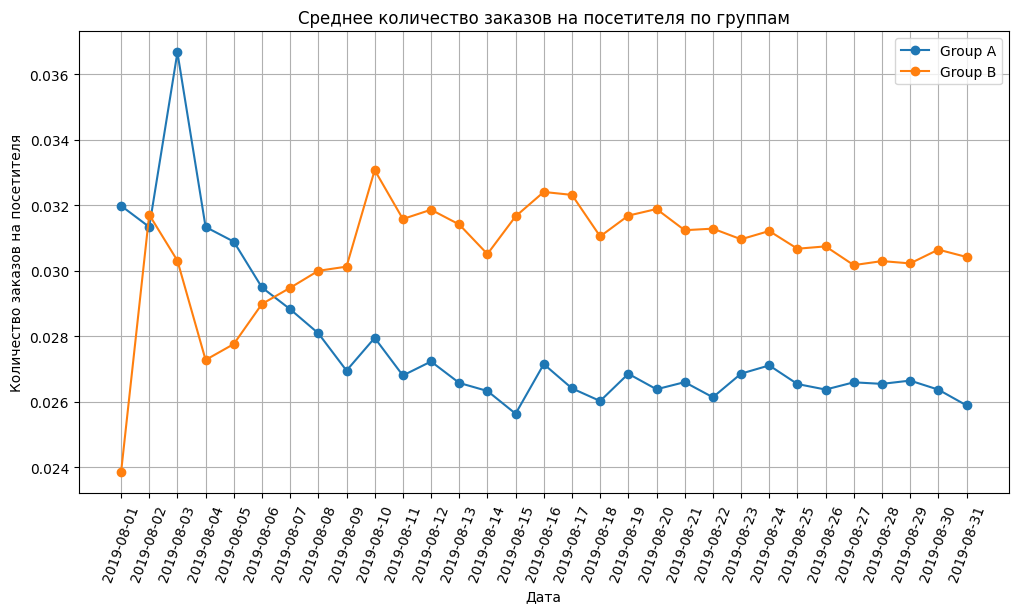

In [20]:
plt.figure(figsize = (12, 6))
plt.plot(orders_a_cum['date'], orders_a_cum['orders_avg'], label = 'Group A', marker = 'o')
plt.plot(orders_b_cum['date'], orders_b_cum['orders_avg'], label = 'Group B', marker = 'o')
plt.legend()
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Количество заказов на посетителя')
plt.title('Среднее количество заказов на посетителя по группам')
plt.xticks(rotation = 70);

На одного посетителя из группы "В" приходится больше заказов, чем на "А".
<br>
Отставание исследуемой группы в начале теста можно, предположительно, объяснить техническими проблемами новой версии. На 10-й день исследования показатели стабилизировались.

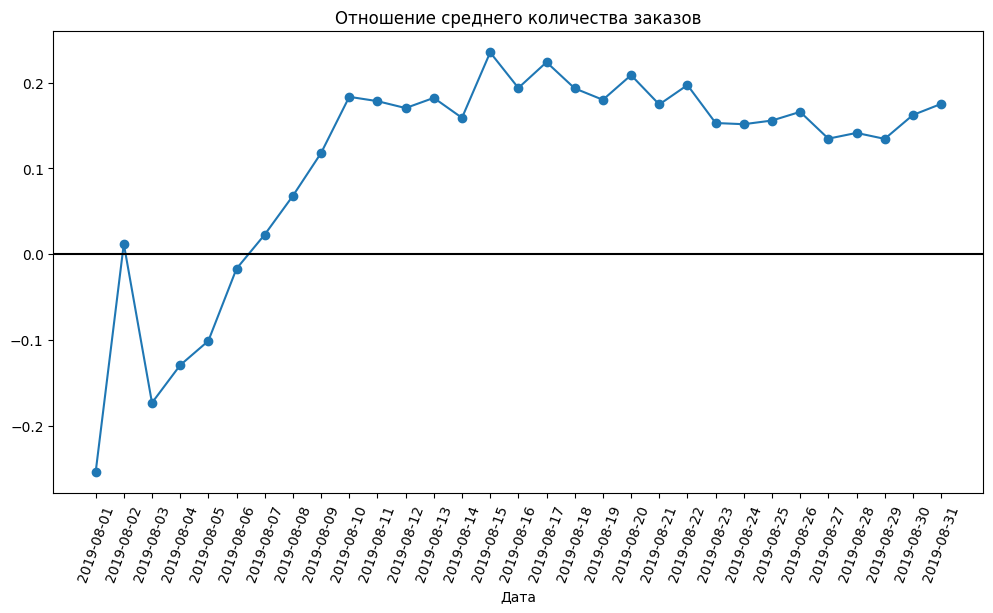

In [21]:
plt.figure(figsize = (12, 6))
plt.plot(orders_cum['date'], orders_cum['orders_avg_b'] / orders_cum['orders_avg_a']-1, marker = 'o')
plt.axhline(y=0, color = 'black', linestyle = 'solid')
plt.title('Отношение среднего количества заказов')
plt.xlabel('Дата')
plt.xticks(rotation = 70);

В среднем на посетителя из группы "В" приходится на 15% больше заказов.

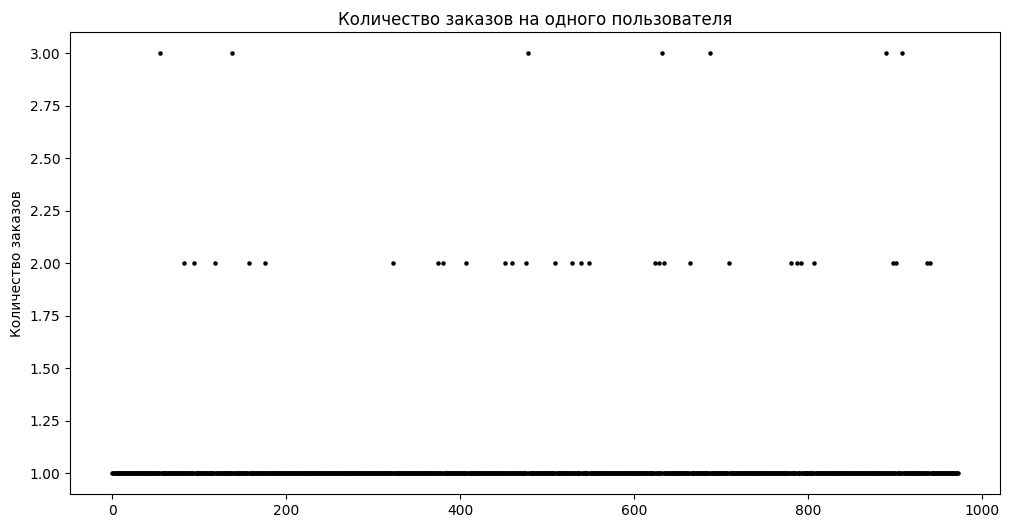

In [22]:
plt.figure(figsize = (12, 6))
buyers = orders.groupby('visitor_id').agg({'transaction_id':'count'}).reset_index()
buyers.columns = ['visitor', 'orders_count']
x_values_buyers = pd.Series(range(0,len(buyers['orders_count'])))
plt.scatter(x_values_buyers, buyers['orders_count'], s = 5, c = 'black')
plt.ylabel('Количество заказов')
plt.title('Количество заказов на одного пользователя');

In [23]:
np.percentile(buyers['orders_count'], [95, 99])

array([1., 2.])

In [24]:
orders_99 = int(np.percentile(buyers['orders_count'], [99]))
buyers.query('orders_count > @orders_99')['visitor'].count()

7

Большая часть покупателей сделали 1-2 заказа, при этом больше 2-х заказов сделали всего 7 человек и это не более 1% от всех клиентов.

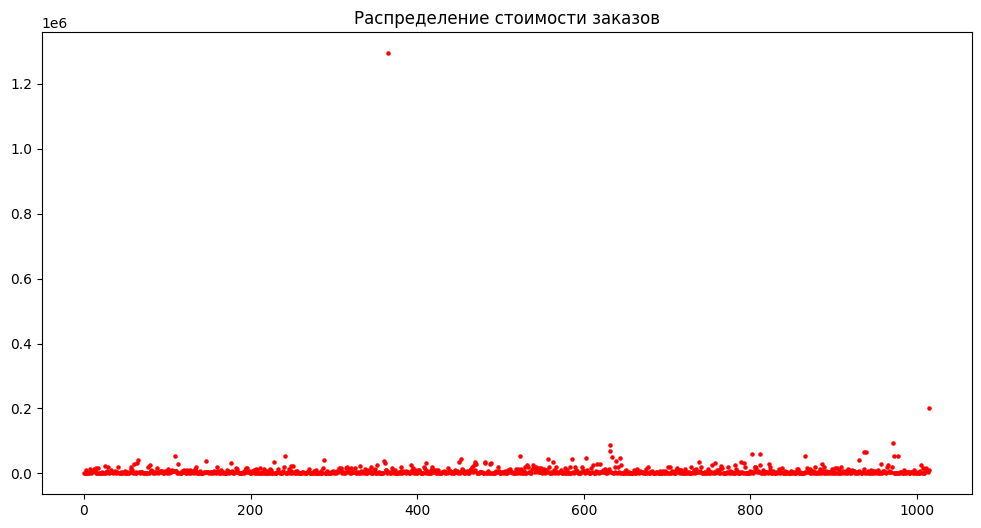

In [25]:
plt.figure(figsize = (12, 6))
x_values_orders = pd.Series(range(0, len(orders['transaction_id'])))
plt.scatter(x_values_orders, orders['revenue'], s = 5, c = 'red')
plt.title('Распределение стоимости заказов');

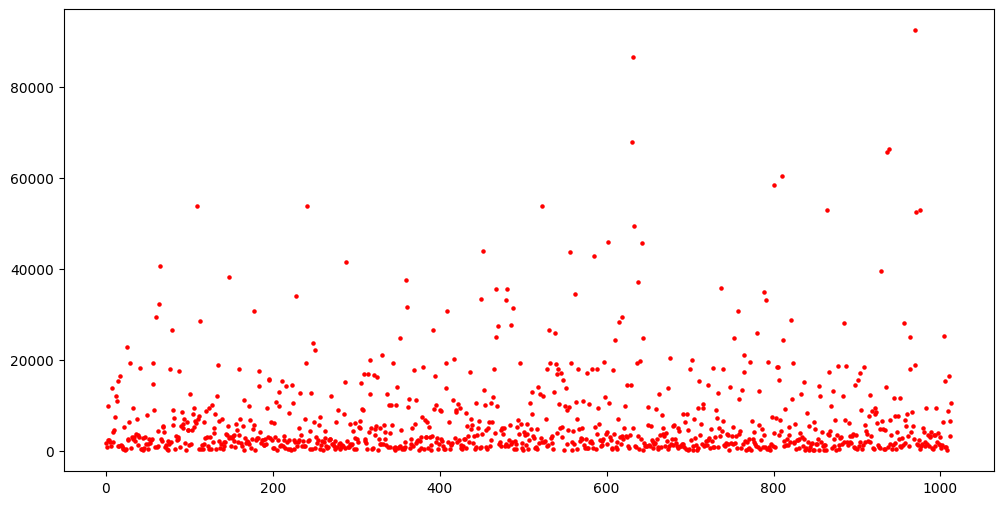

In [26]:
plt.figure(figsize = (12, 6))
x_values_orders = pd.Series(range(0, len(orders.query('revenue < 200000')['transaction_id'])))
plt.scatter(x_values_orders, orders.query('revenue < 200000')['revenue'], s = 5, c = 'red');

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

In [28]:
revenue_95 = int(np.percentile(orders['revenue'], [95]))
orders.query('revenue > @revenue_95')['revenue'].count()

51

Стоимость большей части заказов лежит в пределах 27000, сделавших заказ на большую сумму - не более 5%, посетителей, чей заказ превышает 54000 - не более 1%.

Статистика
-----

**Количество заказов на группу**

In [29]:
buyers_a = orders[orders['group'] == 'A'].groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'})
buyers_a.columns = ['visitor_id', 'order_count']
buyers_b = orders[orders['group'] == 'B'].groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'})
buyers_b.columns = ['visitor_id', 'order_count']

In [30]:
buyers_a_list = pd.concat([buyers_a['order_count'], \
                           pd.Series(0, index = np.arange(visitors[visitors['group'] == 'A']['visitors'].sum()\
                                                          - len(buyers_a['order_count'])), name = 'orders')], axis = 0)
buyers_b_list = pd.concat([buyers_b['order_count'], \
                           pd.Series(0, index = np.arange(visitors[visitors['group'] == 'B']['visitors'].sum()\
                                                          - len(buyers_b['order_count'])), name = 'orders')], axis = 0)

Нулевая гипотеза - между группами теста "А" и "В" отсутствуют значимые различия в количестве заказов, альтернативная гипотеза - различия есть. Оценить разницу предполагается при помощи U-критерия Манна-Уитни с уровнем статистической значимости 0.05.

In [31]:
print('p_value: {0:.3f}'.format(stats.mannwhitneyu(buyers_a_list, buyers_b_list)[1]))
print('Среднее количество заказов в группе "В" больше на: {0:.2f}%'.format((buyers_b_list.mean()/buyers_a_list.mean()-1)*100))

p_value: 0.011
Среднее количество заказов в группе "В" больше на: 15.98%


В среднем на посетителей из группы "В" приходится на 16% заказов больше, чем на группу "А" и эта разница статистически значимая.

**Средний чек**

Нулевая гипотеза - средний чек в обеих группах одинаковый, альтернативная - средняя стоимость заказа разная.

In [32]:
print('p_value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue']\
                                          , orders[orders['group'] == 'B']['revenue'])[1]))
print('Средняя выручка группы "В" больше на {0:.2f}%'.format((orders[orders['group'] == 'B']['revenue'].mean() \
                                                              / orders[orders['group'] == 'A']['revenue'].mean() - 1)*100))

p_value: 0.829
Средняя выручка группы "В" больше на 28.66%


Несмотря на то, что средний чек группы "В" больше на 28%, разница незначимая, вероятно, из-за выбросов.

**Очистка данных от выбросов**

In [33]:
weird_users = buyers_a.query('order_count > @orders_99')\
.append(buyers_b.query('order_count > @orders_99')).append(orders.query('revenue > @revenue_95')[['visitor_id', 'revenue']])\
.drop_duplicates(['visitor_id'])

In [34]:
weird_users['visitor_id'].nunique()

58

Было решено отбросить последние 5% значений по выручке и 1% по количеству заказов, как заметно отклоняющиеся от среднего.
<br>
В эту группу попали 58 покупателей.

**Количество заказов на группу после фильтрации**

Нулевая и альтернативная гипотеза такие же, как и в первом тесте.

In [35]:
purified_a_list = pd.concat([buyers_a[np.logical_not(buyers_a['visitor_id'].isin(weird_users['visitor_id']))]['order_count'], \
                           pd.Series(0, index = np.arange(visitors[visitors['group'] == 'A']['visitors'].sum()\
                                                          - len(buyers_a['order_count'])), name = 'orders')], axis = 0)
purified_b_list = pd.concat([buyers_b[np.logical_not(buyers_b['visitor_id'].isin(weird_users['visitor_id']))]['order_count'], \
                           pd.Series(0, index = np.arange(visitors[visitors['group'] == 'B']['visitors'].sum()\
                                                          - len(buyers_b['order_count'])), name = 'orders')], axis = 0)

In [36]:
print('p_value: {0:.3f}'.format(stats.mannwhitneyu(purified_a_list, purified_b_list)[1]))
print('Среднее количество заказов в группе "В" больше на: {0:.2f}%'.format((purified_b_list.mean()\
                                                                            /purified_a_list.mean()-1)*100))

p_value: 0.012
Среднее количество заказов в группе "В" больше на: 18.19%


Преимущество группы "В" увеличилось до почти +19% заказов на пользователя, можно предположить, что на группу "А" приходилось больше людей, сделавших более 2-х заказов. Эта разница все так же статистически значима.

**Средний чек после фильтрации**

In [37]:
print('p_value: {0:.3f}'.format(stats.mannwhitneyu\
                                (orders[np.logical_and(orders['group'] == 'A', orders['revenue'] < revenue_95)]['revenue'],\
                                 orders[np.logical_and(orders['group'] == 'B', orders['revenue'] < revenue_95)]['revenue'])[1]))
print('Средняя выручка группы "В" больше на {0:.2f}%'.format\
      ((orders[np.logical_and(orders['group'] == 'B', orders['revenue'] < revenue_95)]['revenue'].mean()\
                       / orders[np.logical_and(orders['group'] == 'A', orders['revenue'] < revenue_95)]['revenue'].mean()\
        - 1)*100))

p_value: 0.699
Средняя выручка группы "В" больше на -5.87%


После удаления выбросов средние чеки практически одинаковые, это подтверждается и полным отсутствием статистических различий.

Вывод
----

На основании проведенного анализа можно сделать следующие выводы:
<br>
Наиболее приоритетными направлениями для работы можно считать добавление формы подписки на основные страницы сайта и добавление блоков рекомендаций. Также высокий приоритет у предложений по подключению двух новых каналов трафика и показу баннеров об акциях и распродажах.
<br>
По результатам а/б теста на определение изменения количества заказов между двумя группами посетителей сайта, отмечается следующее:
<br>
На протяжение всего теста отмечалось небольшое преимущество исследуемой группы над контрольной. После удаления необычно больших по стоимости заказов, а также пользователей, сделавших более 2-х покупок, можно сделать вывод о заметном преимуществе в количестве заказов в исследуемой группе, что подтверждается статистическими тестами.
<br>
Можно заключить, что а/б тест прошел успешно и его следует прекращать. Доказано преимущество варианта исследуемой группы.